In [1]:
import numpy as np
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

np.random.seed(1)

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

Using TensorFlow backend.


In [2]:
x_train = np.load("{}/x_train.npy".format(TRAIN_DATASET_PATH))
y_train = np.load("{}/y_train.npy".format(TRAIN_DATASET_PATH))

x_train.shape, y_train.shape

((24916, 299, 299, 3), (24916, 2))

In [3]:
IMAGE_SIZE = x_train.shape[1]
IMAGE_SIZE

299

In [4]:
def vgg_2D():
    base_model = VGG16(weights='imagenet',include_top=False,pooling='max',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    
    X = Dense(1024, activation='relu')(X)
    X = Dropout(0.5)(X)
    predictions = Dense(2, activation='softmax', trainable=True)(X)
    
    #for layer in base_model.layers[:]:
        #layer.trainable=False
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = None
model=vgg_2D()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)

In [5]:
# check input
print(x_train.shape, y_train.shape)

(24916, 299, 299, 3) (24916, 2)


In [6]:
model=None
model=vgg_2D()
path_model='vgg_2D_exp_1.h5'  

# set the learning rate
K.set_value(model.optimizer.lr, 0.001) 

h=model.fit(x=x_train,     
            y=y_train, 
            batch_size=16, 
            epochs=100, 
            verbose=1, 
            validation_split=0.1,
            shuffle=True,
            )

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 22424 samples, validate on 2492 samples
Epoch 1/100
22424/22424 [==============================] - 1488s 66ms/step - loss: 4.2656 - acc: 0.5347 - val_loss: 0.9440 - val_acc: 0.3419
Epoch 2/100
22424/22424 [==============================] - 1440s 64ms/step - loss: 0.7336 - acc: 0.5916 - val_loss: 0.8130 - val_acc: 0.4539
Epoch 3/100
22424/22424 [==============================] - 1457s 65ms/step - loss: 0.5360 - acc: 0.7223 - val_loss: 0.7850 - val_acc: 0.5498
Epoch 4/100
22424/22424 [==============================] - 1456s 65ms/step - loss: 0.4031 - acc: 0.8153 - val_loss: 1.0314 - val_acc: 0.4876
Epoch 5/100
22424/22424 [==============================] - 1456s 65ms/step - loss: 0.2989 - acc: 0.8754 - val_loss: 0.9706 - val_acc: 0.5642
Epoch 6/100
22424/22424 [==============================] - 1459s 65ms/step - loss: 0.2147 - acc: 0.9177 - val_loss: 1.13

KeyboardInterrupt: 

In [7]:
model.save(path_model)

In [8]:
 def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid(True)
    #plt.savefig('vgg2b_loss.jpg', dpi=300)
    plt.show()
    
def plot_loss(history):
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid(True)
    #plt.savefig('vgg2b_acc.jpg', dpi=300)
    plt.show()

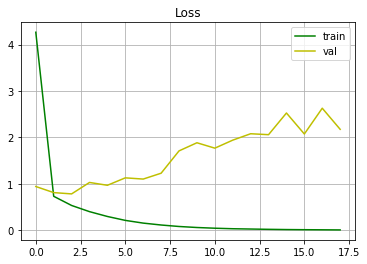

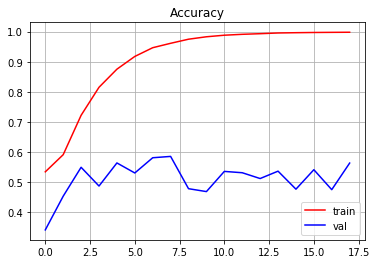

Done!


In [9]:
plot_loss_accu(model.history)
plot_loss(model.history)
print("Done!")

In [8]:
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [9]:
#y_pred = model.predict(x_test)
# get labels from predictions
#pred_labels = np.array([np.argmax(pred) for pred in y_pred])
#convert ground truths to column values
#y_test = np.argmax(y_test, axis=1)
#accuracy = np.mean((y_test==pred_labels))